In [1]:
import pybamm
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir(pybamm.__path__[0]+'/..')

In [30]:
(0.971986-0.01502)*0.928433*33133 + 0.01502*33133

29935.626213472973

In [31]:
(0.971986-0.01502)*0.928433 + 0.01502

0.9034988142779999

In [12]:
(1-0.970355)*(1-0.27)*63104 + 0.27*63104

18403.704198400002

In [13]:
(1-0.970355)*(1-0.27) + 0.27

0.29164085000000006

In [23]:
(0.9084-0.2916)/(0.9084-0.27)

0.9661654135338347

In [14]:
model = pybamm.lithium_ion.DFN()
chemistry = pybamm.parameter_sets.ORegan2022
param= pybamm.ParameterValues(chemistry=chemistry)
param.update({"Maximum concentration in negative electrode [mol.m-3]": 33133})
param.update({"Maximum concentration in positive electrode [mol.m-3]": 63104})
param.update({"Initial concentration in negative electrode [mol.m-3]": 29658})
param.update({"Initial concentration in positive electrode [mol.m-3]": 18404})

var_pts = {
    "x_n": 20,  # negative electrode
    "x_s": 20,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 60,  # negative particle
    "r_p": 60,  # positive particle
}

# set mesh
submesh_types = model.default_submesh_types
particle_mesh = pybamm.MeshGenerator(pybamm.Exponential1DSubMesh, submesh_params={"side": "right", "stretch": 4.6})
submesh_types["negative particle"] = particle_mesh
submesh_types["positive particle"] = particle_mesh

In [ ]:
exp1 = pybamm.Experiment(["Discharge at C/10 until 2.5V"])
sim1 = pybamm.Simulation(model, parameter_values=param, experiment=exp1, var_pts=var_pts, submesh_types=submesh_types)
solution1 = sim1.solve(calc_esoh=False)
Q_sim = solution1["Discharge capacity [A.h]"].entries
V_sim = solution1["Terminal voltage [V]"].entries
fig, ax = plt.subplots()
ax.plot(Q_sim,V_sim)
ax.set_xlabel("Discharge capacity [A.h]")
ax.set_ylabel("Terminal voltage [V]")
plt.show()

In [15]:
exp2 = pybamm.Experiment(["Discharge at 1C until 2.5V"])
sim2 = pybamm.Simulation(model, parameter_values=param, experiment=exp2, var_pts=var_pts, submesh_types=submesh_types)
solution2 = sim2.solve(calc_esoh=False)
t_sim = solution2["Time [s]"].entries
V_sim = solution2["Terminal voltage [V]"].entries

In [16]:
exp_data = pd.read_csv("/mnt/c/Users/sokane/pybamm_data/validation_data/discharge_1C_voltage.csv",header=0).to_numpy()
t1 = exp_data[:,0]
V1 = exp_data[:,1]
t2 = exp_data[:,5]
V2 = exp_data[:,6]
t3 = exp_data[:,10]
V3 = exp_data[:,11]

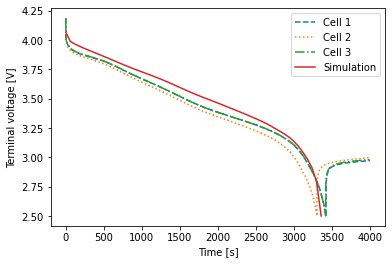

In [17]:
fig, ax = plt.subplots()
ax.plot(t1,V1,linestyle="dashed",label="Cell 1")
ax.plot(t2,V2,linestyle="dotted",label="Cell 2")
ax.plot(t3,V3,linestyle="dashdot",label="Cell 3")
ax.plot(t_sim,V_sim,linestyle="solid",label="Simulation")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Terminal voltage [V]")
ax.legend()
plt.savefig("/mnt/c/Users/sokane/pybamm_data/validation_data/1C_discharge_comparison_v4.pdf")
plt.show()

In [18]:
exp3 = pybamm.Experiment([
    "Discharge at 1C for 3240 seconds",
    "Charge at 0.7C until 4.2 V",
    "Discharge at 1C until 2.5 V",
    "Charge at 0.3C until 4.2 V",
])
sim3 = pybamm.Simulation(model, parameter_values=param, experiment=exp3, var_pts=var_pts, submesh_types=submesh_types)
solution3 = sim3.solve(calc_esoh=False)
t_sim = solution3["Time [s]"].entries
V_sim = solution3["Terminal voltage [V]"].entries

In [19]:
exp_data = pd.read_csv(
    "/mnt/c/Users/sokane/pybamm_data/validation_data/current_switch_1C_voltage.csv",header=0
).to_numpy()
t1 = exp_data[:,0]
V1 = exp_data[:,1]
t2 = exp_data[:,5]
V2 = exp_data[:,6]
t3 = exp_data[:,10]
V3 = exp_data[:,11]

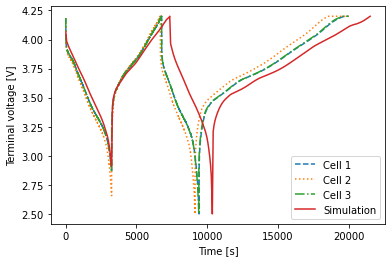

In [20]:
fig, ax = plt.subplots()
ax.plot(t1,V1,linestyle="dashed",label="Cell 1")
ax.plot(t2,V2,linestyle="dotted",label="Cell 2")
ax.plot(t3,V3,linestyle="dashdot",label="Cell 3")
ax.plot(t_sim,V_sim,linestyle="solid",label="Simulation")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Terminal voltage [V]")
ax.legend()
plt.show()